In [1]:
import gdown

print('Downloading dataset...\n')
     
# Download the file.
gdown.download('https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H', 
                'Womens Clothing E-Commerce Reviews.csv', 
                quiet=False)
    
print('\n\nDONE.')

Downloading...
From: https://drive.google.com/uc?id=1ZYdt0zN4LjWqP3cQDblNhXjeohcryY5H
To: /content/Womens Clothing E-Commerce Reviews.csv
100%|██████████| 8.48M/8.48M [00:00<00:00, 76.4MB/s]




DONE.


In [2]:
import pandas as pd

data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data_df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
for feature in data_df.columns:
  print('피처명: {}, 데이터 타입: {}'.format(feature, data_df[feature].dtype))

피처명: Clothing ID, 데이터 타입: int64
피처명: Age, 데이터 타입: int64
피처명: Title, 데이터 타입: object
피처명: Review Text, 데이터 타입: object
피처명: Rating, 데이터 타입: int64
피처명: Recommended IND, 데이터 타입: int64
피처명: Positive Feedback Count, 데이터 타입: int64
피처명: Division Name, 데이터 타입: object
피처명: Department Name, 데이터 타입: object
피처명: Class Name, 데이터 타입: object




*   타겟 변수: Recommended ID (1: 추천함, 0: 추천하지 않음) 
*   명목형(Categorical) 변수: Division Name, Department Name, Class Name, Clothing ID
*   수치형(Numerical) 변수: Age, Rating, Positive Feedback Count



# 훈련-검증-테스트 데이터셋 분리

In [5]:
import random
import numpy as np

# 80% 훈련 데이터셋, 10% 검증 데이터셋, 10% 테스트 데이셋으로 분리 
train_size = int(0.8 * len(data_df))
val_size = int(0.1 * len(data_df))
test_size = len(data_df) - (train_size + val_size)

# Sanity check 
assert((train_size + val_size + test_size) == len(data_df))

# 데이터셋 전체 index 리스트를 numpy 형태로 저장 
indeces = np.arange(0, len(data_df))

random.shuffle(indeces)

train_idx = indeces[0:train_size]
val_idx = indeces[train_size:(train_size + val_size)]
test_idx = indeces[(train_size + val_size):]

# Sanity check
assert(len(train_idx) == train_size)
assert(len(test_idx) == test_size)


print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))
print('      Test size: {:,}'.format(test_size))

  Training size: 18,788
Validation size: 2,348
      Test size: 2,350


# Baseline 모델



1.   무조건 추천하는 모델 (머신러닝 X)
2.   사용자 Rating 기반 예측 모델 (머신러닝 X)
3.   XGBoost 분류기 (Non-텍스트 피처 Only)



## 1. 무조건 추천하는 모델

In [6]:
from sklearn.metrics import f1_score

test_df = data_df.iloc[test_idx]

predictions = [1]*len(test_df)

f1 = f1_score(y_true=test_df["Recommended IND"], y_pred=predictions)

print('1번 베이스라인 모델(무조건 추천하는 모델)의 성능....')
print('\nF1: %.3f' % f1)

1번 베이스라인 모델(무조건 추천하는 모델)의 성능....

F1: 0.910


## 2. 사용자 Rating 기반 예측 모델

In [7]:
from sklearn.metrics import f1_score

predictions = test_df["Rating"] >= 3

f1 = f1_score(y_true=test_df["Recommended IND"], y_pred=predictions)

print('2번 베이스라인 모델(사용자 Rating >= 3이면 추천하는 모델)의 성능...')
print('\nF1: %.3f' % f1)

2번 베이스라인 모델(사용자 Rating >= 3이면 추천하는 모델)의 성능...

F1: 0.955


## 3. XGBoost 분류기

In [8]:
!pip install xgboost

#### 명목형 변수(Categorical Variables) 인코딩

In [9]:
data_df["Clothing ID"] = data_df["Clothing ID"].astype('category')
data_df["Division Name"] = data_df["Division Name"].astype('category')
data_df["Department Name"] = data_df["Department Name"].astype('category')
data_df["Class Name"] = data_df["Class Name"].astype('category')

In [10]:
for feature in data_df.columns:
  print('피처명: {}, 데이터 타입: {}'.format(feature, data_df[feature].dtype))

피처명: Clothing ID, 데이터 타입: category
피처명: Age, 데이터 타입: int64
피처명: Title, 데이터 타입: object
피처명: Review Text, 데이터 타입: object
피처명: Rating, 데이터 타입: int64
피처명: Recommended IND, 데이터 타입: int64
피처명: Positive Feedback Count, 데이터 타입: int64
피처명: Division Name, 데이터 타입: category
피처명: Department Name, 데이터 타입: category
피처명: Class Name, 데이터 타입: category


In [11]:
data_df["Clothing ID"] = data_df["Clothing ID"].cat.codes
data_df["Division Name"] = data_df["Division Name"].cat.codes
data_df["Department Name"] = data_df["Department Name"].cat.codes
data_df["Class Name"] = data_df["Class Name"].cat.codes

In [12]:
data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,2,2,5
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,0,1,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,0,1,3
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,1,0,13
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,0,4,0


In [13]:
for feature in data_df.columns:
  print('피처명: {}, 데이터 타입: {}'.format(feature, data_df[feature].dtype))

피처명: Clothing ID, 데이터 타입: int16
피처명: Age, 데이터 타입: int64
피처명: Title, 데이터 타입: object
피처명: Review Text, 데이터 타입: object
피처명: Rating, 데이터 타입: int64
피처명: Recommended IND, 데이터 타입: int64
피처명: Positive Feedback Count, 데이터 타입: int64
피처명: Division Name, 데이터 타입: int8
피처명: Department Name, 데이터 타입: int8
피처명: Class Name, 데이터 타입: int8


#### 수치형 변수(Numerical Variables) 정수형(Float)으로 변환

In [14]:
data_df["Age"] = data_df["Age"].astype('float')
data_df["Rating"] = data_df["Rating"].astype('float')
data_df["Positive Feedback Count"] = data_df["Positive Feedback Count"].astype('float')

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1,0.0,2,2,5
1,1080,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1,4.0,0,1,3
2,1077,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0,0.0,0,1,3
3,1049,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1,0.0,1,0,13
4,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1,6.0,0,4,0


In [15]:
y_train = data_df["Recommended IND"].iloc[train_idx]
y_val = data_df["Recommended IND"].iloc[val_idx]
y_test = data_df["Recommended IND"].iloc[test_idx]

# 분석에 사용할 일부 피처 선택 
data_df = data_df.drop(columns=["Title", "Review Text", "Recommended IND"])

X_train = data_df.iloc[train_idx]
X_val = data_df.iloc[val_idx]
X_test = data_df.iloc[test_idx]

X_train.head()

,Clothing ID,Age,Rating,Positive Feedback Count,Division Name,Department Name,Class Name
12732,1051,31.0,5.0,1.0,1,0,13
7510,836,34.0,1.0,0.0,0,4,0
23226,1121,35.0,5.0,0.0,0,3,12
19306,1078,43.0,5.0,1.0,1,1,3
294,984,43.0,5.0,3.0,1,3,6


In [16]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

f1 = f1_score(y_true = y_test,
              y_pred = predictions)

print('3번 베이스라인 모델 (XGBoost 분류기 (Non-텍스트 피처 Only))의 성능... ')
print('\nF1: %.3f' % f1)

3번 베이스라인 모델 (XGBoost 분류기 (Non-텍스트 피처 Only))의 성능... 

F1: 0.965


#### Feature Importance

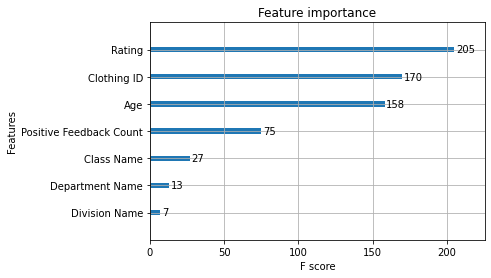

In [17]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plot_importance(model)

pyplot.show()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

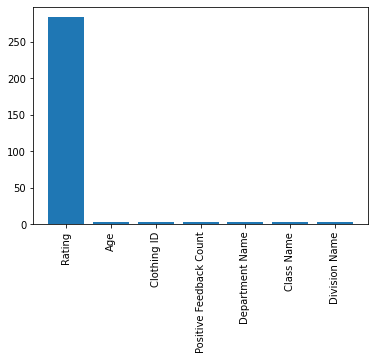

In [18]:
feat_gains = model.get_booster().get_score(importance_type="gain")

pyplot.bar(feat_gains.keys(), feat_gains.values())
pyplot.xticks(rotation = 90)

## 4. BERT 모델링 (Text 피처, 명목형/수치형 변수 피처 모두 사용)

#### 텍스트 피처, 명목형/수치형 피처 합치기

In [19]:
sen_w_feats = []

labels = []

data_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

# Title, Review Text가 결측치일 경우 Nan 값을 empty string으로 대체함.
data_df = data_df.fillna("")

data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


* 영어 텍스트 피처를 이용할 것이기 때문에 수치형/명목형 변수를 합칠 때도 영어로 인코딩.

In [20]:
for index, row in data_df.iterrows():
  
  combined = ""

  combined += "This item comes from the {:} department and {:} division, " \
                "and is classified under {:}. ".format(row["Department Name"], 
                                                       row["Division Name"], 
                                                       row["Class Name"])
                
  combined += "I am {:} years old. ".format(row["Age"])
    
  combined += "I rate this item {:} out of 5 stars. ".format(row["Rating"])

  if not row["Title"] == "":
        combined += row["Title"] + ". "
    
  combined += row["Review Text"]
    
  sen_w_feats.append(combined)
  labels.append(row["Recommended IND"])


print(len(sen_w_feats))

23486


In [21]:
import textwrap

wrapper = textwrap.TextWrapper(width=80) 

print(wrapper.fill(sen_w_feats[1]))

This item comes from the Dresses department and General division, and is
classified under Dresses. I am 34 years old. I rate this item 5 out of 5 stars.
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm
glad i did bc i never would have ordered it online bc it's petite.  i bought a
petite and am 5'8".  i love the length on me- hits just a little below the knee.
would definitely be a true midi on someone who is truly petite.


#### BERT 모델링

In [22]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [23]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 40.7 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 36.6 MB/s 
     |████████████████████████████████| 596 kB 44.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [24]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [25]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 2, 
)

desc = model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [26]:
batch_size = 32
learning_rate = 1e-5 
epochs = 4

max_len = 0


for sent in sen_w_feats:
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  204


In [27]:
max_len = 200

In [28]:
input_ids = []
attention_masks = []

print('Encoding all reviews in the dataset...')

# For every sentence...
for sent in sen_w_feats:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

Encoding all reviews in the dataset...


In [29]:
# 리스트를 텐서로
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

In [30]:
from torch.utils.data import TensorDataset

# Split the samples, and create TensorDatasets for each split. 
train_dataset = TensorDataset(input_ids[train_idx], attention_masks[train_idx], labels[train_idx])
val_dataset = TensorDataset(input_ids[val_idx], attention_masks[val_idx], labels[val_idx])
test_dataset = TensorDataset(input_ids[test_idx], attention_masks[test_idx], labels[test_idx])

In [31]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [32]:
from transformers import AdamW

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = learning_rate, 
                  eps = 1e-8 
                )


In [33]:
from transformers import get_linear_schedule_with_warmup

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples!)
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [34]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [35]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [36]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    588.    Elapsed: 0:01:19.
  Batch    80  of    588.    Elapsed: 0:02:39.
  Batch   120  of    588.    Elapsed: 0:03:59.
  Batch   160  of    588.    Elapsed: 0:05:19.
  Batch   200  of    588.    Elapsed: 0:06:39.
  Batch   240  of    588.    Elapsed: 0:07:59.
  Batch   280  of    588.    Elapsed: 0:09:19.
  Batch   320  of    588.    Elapsed: 0:10:39.
  Batch   360  of    588.    Elapsed: 0:11:58.
  Batch   400  of    588.    Elapsed: 0:13:18.
  Batch   440  of    588.    Elapsed: 0:14:38.
  Batch   480  of    588.    Elapsed: 0:15:58.
  Batch   520  of    588.    Elapsed: 0:17:18.
  Batch   560  of    588.    Elapsed: 0:18:38.

  Average training loss: 0.20
  Training epcoh took: 0:19:32

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.16
  Validation took: 0:00:55

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    588.    Elapsed: 0:01:20.
  Batch    80  of    588.    Elapsed: 0:02:39.
  Batch  

In [37]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap (doesn't seem to work in Colab).
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.20,0.16,0.94,0:19:32,0:00:55
2,0.12,0.13,0.95,0:19:32,0:00:55
3,0.10,0.15,0.95,0:19:32,0:00:55
4,0.08,0.16,0.95,0:19:34,0:00:55


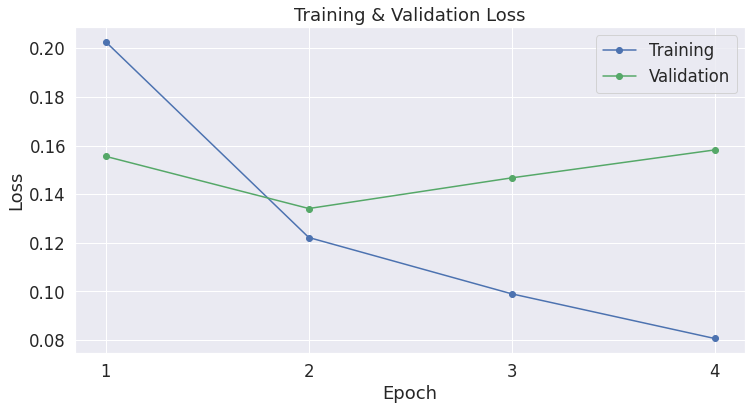

In [38]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [40]:
# Create a DataLoader to batch our test samples for us. We'll use a sequential
# sampler this time--don't need this to be random!
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=batch_size)

print('Predicting labels for {:,} test sentences...'.format(len(test_dataset)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,350 test sentences...
    DONE.


In [41]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

In [43]:
from sklearn.metrics import f1_score

# Calculate the F1
f1 = f1_score(flat_true_labels, flat_predictions)

print('F1 Score: %.3f' % f1)

F1 Score: 0.973
